In [1]:
#execute in case of need to rerun the previous codes
!rm -r Data_sets
!ls

rm: cannot remove 'Data_sets': No such file or directory
sample_data


# Assignment 5: Traffic Sign Classifier

---

Using computer vision, deep learning, and convolutional neural networks, create a pipeline that classifies traffic signs.  Train and validate a model so it can classify traffic sign images using the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). After the model is trained, test it on images of traffic signs that you find on the web.

The goals of this project are the following:

- Load the data set
- Explore, summarize and visualize the data set
- Design, train and test a model architecture
- Use the model to make predictions on new images
- Use data augmentation and transfer learning
- Analyze the softmax probabilities of the new images
- Summarize the results of each step with a written report

The writeup should be included in additional cells within the notebook. Some sample cells are included so that you have a guide of what is expected of the writeup. Additionally, add a README file with an introduction to what you developed, as well as the steps needed to run it.

**Notes:** 
- Unless you have set up a GPU on a desktop with all the needed packages, train the model using a GPU enabled google colab environment.
- Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run.

**Rubric:**

1. Uploaded the notbook with all cells executed and the writeup cells, and the HTML output of the code.
2. Downloaded and loaded the dataset. There was a description of the data, and a visualization of one image of each category.
3. Preprocessed the data, and provided a description of the preprocessing steps taken. Use data augmentation to improve the available data.
4. Defined a model architecture using Convlolutional layers. Justified the model architecture based on other models, such as VGG or GoogleNet.
5. Described how the model was trained, mentioning how the hyperparameters (optimizer, batch size, loss function, etc) were selected, and what tests / modifications to the model you performed.
6. Tested the model on a subset of the data set and measure performance. 
7. Included images of traffic signs found from the web in a different folder, and tested the model on said images. Those images were visualized, and a discussion as to why those were chosen was included.
8. Measured the performance on the new images and compared it to the test dataset.
9. For the new images, output of the top 5 softmax predictions was included, and mentioned why you think those predictions were made.
10. Achieved at least 80% accuracy on the test images.
11. Create an additional model using transfer learning to try to improve performance.
12. Saved the model and weights to a file for later use.

## Basic includes

Download the dataset of the traffic signs

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import cv2

import keras
from keras import models, layers, optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications import VGG16

import os
import random

Using TensorFlow backend.


## Load and visualize the data

Provide a basic summary of the German traffic sign data set. In the code, the analysis should be done using python, numpy, and matplotlib rather than hardcoding results manually. Include a graph of the distribution of the image classes.

- The size of training set is ?
The restulting training set has a size of 1582 files

- The size of the validation set is ?
The restulting validation set is 20% of the training set

- The size of test set is ?
the resulting validation set has a size of 695 files

- The shape of a traffic sign image is ?
It is variable, they were cropped so the size of the images is different

- The number of unique classes/labels in the data set is ?
There was a total of 43 folders in the dataset, every folder is a diferent category with different photographies of the same picture.

### Load the dataset

In [3]:
!git clone https://github.com/DeepLearningVision-2019/Data_sets.git

Cloning into 'Data_sets'...
remote: Enumerating objects: 49314, done.
remote: Total 49314 (delta 0), reused 0 (delta 0), pack-reused 49314
Receiving objects: 100% (49314/49314), 473.80 MiB | 29.97 MiB/s, done.
Resolving deltas: 100% (123/123), done.
Checking out files: 100% (49261/49261), done.


In [4]:
#get info of the data set
data_dir = './Data_sets/German_Traffic_signs/Images'
data_dir_names = os.listdir(data_dir)

data_dir_names.sort()
print("Number of categories: {}" .format(len(data_dir_names)))

images_count = []

for name in data_dir_names:
  folder = os.listdir(os.path.join(data_dir, name)) #every file inside
  #print(folder)
  images_count.append((name, len(folder)-1)) #dont count the csv file
  
  #print("Images in folder {} are {}".format(name, len(folder)-1))

images_count.sort(key = lambda x: x[1])
print(images_count)


Number of categories: 43
[('00000', 210), ('00019', 210), ('00037', 210), ('00027', 240), ('00032', 240), ('00041', 240), ('00042', 240), ('00024', 270), ('00029', 270), ('00039', 300), ('00021', 330), ('00020', 360), ('00040', 360), ('00022', 390), ('00036', 390), ('00006', 420), ('00016', 420), ('00034', 420), ('00030', 450), ('00023', 510), ('00028', 540), ('00026', 600), ('00015', 630), ('00033', 689), ('00014', 780), ('00031', 780), ('00017', 1110), ('00018', 1200), ('00035', 1200), ('00011', 1320), ('00003', 1410), ('00008', 1410), ('00007', 1440), ('00009', 1470), ('00025', 1500), ('00005', 1860), ('00004', 1980), ('00010', 2010), ('00038', 2070), ('00012', 2100), ('00013', 2160), ('00001', 2220), ('00002', 2250)]


In [5]:
!mkdir ./Data_sets/German_Traffic_signs/test
!mkdir ./Data_sets/German_Traffic_signs/train
!ls ./Data_sets/German_Traffic_signs/

Images	Readme-Images.txt  test  train


First I checked the csv files to check if there were different classes in the same folder, the answer is no. Every directories is a different class. Then using python calculated the number of samples in every category resulting in a big difference of data. Some classes have more than 2000 images and other ones barely surpass 200.

Then I created the folders to separate the datasets and move the preprocessed images to those directories.

### Visualize the data set

Using matplotlib, include a figure with one image from each class. Propose a class name for each.

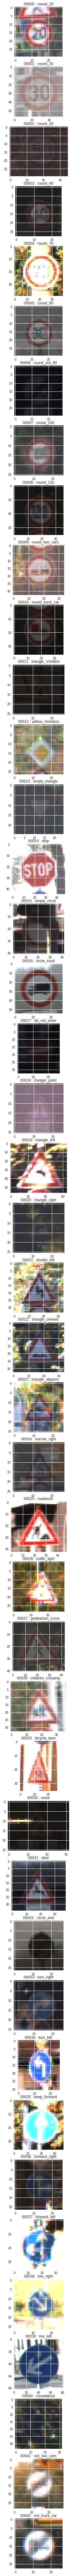

In [6]:
label_names = [
    'round_20',
    'round_30',
    'round_50',
    'round_60',
    'round_70',
    'round_80',
    'round_not_80',
    'round_100',
    'round_120',
    'round_two_cars',
    'round_truck_car',
    'triangle_Vorfahrt',
    'yellow_rhombus',
    'empty_triangle',
    'stop',
    'empty_circle',
    'circle_truck',
    'do_not_enter',
    'Danger_point',
    'triangle_left',
    'triangle_right',
    'double_left',
    'triangle_uneven',
    'triangle_slippery',
    'narrow_right',
    'roadwork',
    'traffic_light',
    'pedestrian_cross',
    'children_crossing',
    'bicycle_lane',
    'snow',
    'deer',
    'circle_end',
    'turn_right',
    'turn_left',
    'keep_forward',
    'forward_right',
    'forward_left',
    'low_right',
    'low_left',
    'roundabout',
    'not_two_cars',
    'not_truck_car' 
    ]


directories =  os.listdir(data_dir) #43 directories
directories.sort()


figure, plots = plt.subplots(len(directories), 1, figsize=(150,150))

for ln, sp, d in zip(label_names, plots, directories):
  temp_dir = os.path.join(data_dir, d)
  image_dir =  os.listdir(temp_dir) #all the images
  image_dir.sort()
  
  nm = (image_dir[0]) #get the name of the first
  
  im = cv2.imread(os.path.join(temp_dir,nm))             
  sp.set_title("{} : {}".format((d), ln))
  sp.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

After printing the first image taken as sample of every class during  the separation of datasets process I tried to figure out what makes the class different to the other ones. In some cases it was almost imposible to recognize anything so I opened the images of that cases in http://paulcuth.me.uk/netpbm-viewer/. 

There were also hard cases as the Vorfahrt sign. In that cases i used the [wikipedia site](https://en.wikipedia.org/wiki/Road_signs_in_Germany) to check what it means and give it a best name.

## Preprocess the data set

Propose a preprocessing pipeline for the images. At least, the data should be normalized and augmented, but other techniques have to be considered: grayscale, blurring, using mean and standard deviation, etc. Describe what techniques you used and why. 

Consider using both OpenCV and [Keras' Imagedatagenerators](https://keras.io/preprocessing/image/) for this step.

Additionally, include a plot of the images before and after the preprocessing step.

In [0]:
#generator
augmented_data_gen = ImageDataGenerator(
rescale=1./255,
rotation_range = 20,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range=0.2,
horizontal_flip=False, #this may changue the meaning of the sign so it is set to false
validation_split=0.2,  #to use 80%
fill_mode='nearest')

Here is defined the preprocess using cv2.

I applied gaussian blur. The resize was going to be part of it, but i prefered to let that to the data generator, also here using numpy the image's dimensions were expanded to use it with the keras' image preprocessing, just indicate that it was going to be in just one channel

In [0]:
def preprocess(img):
  resize_dim = (40,40)
  blur_kernel = (7,7)
  temp_preprocess = img
  #resize the images, some are too big (100px) and another ones too small( 20px )
  #temp_preprocess = (cv2.resize(temp_preprocess, dsize=resize_dim, interpolation=cv2.INTER_CUBIC))
  
  #Gaussian blur            if not use canny edge  cv2.Canny(sunflower_gray, lower, upper)
  temp_preprocess = cv2.GaussianBlur(temp_preprocess, blur_kernel, 0)
  
  #expand to indicate is one channel (gray scale)
  temp_preprocess = np.expand_dims(temp_preprocess, axis=2)
  
  #expand to use in the data generator
  #temp_preprocess = np.expand_dims(temp_preprocess, axis=0)
  
  return temp_preprocess

Here is the preprocess of each image.

we use original_images and preprocessed_images to save a copy of every image to plot it in a next cell. Also here I create the directories for the preprocessed images.

In [0]:
original_images = []
preprocessed_images = []
percentage = 0.7

train_dir = './Data_sets/German_Traffic_signs/train'
test_dir = './Data_sets/German_Traffic_signs/test'
directories =  os.listdir(data_dir) #43 directories
directories.sort()



for d in directories:
  
  #create the directory for the preprocessed images
  os.mkdir( os.path.join(train_dir, d)  )
  os.mkdir( os.path.join(test_dir, d)  )


  #get the images names
  category_dir = os.path.join(data_dir, d) #directory of all images
  image_names =  os.listdir(category_dir) #all the images names
  image_names.sort()
  random.shuffle(image_names)

  
  files_moved = 0 #files I already moved
  to_train = np.floor(len(image_names) *percentage) #files I want to move to the train directory


  
  for im in image_names:
    if ('csv' not in im and (files_moved < to_train)): #check if the file is not the csv file of the directory
      read_image = cv2.imread(os.path.join(category_dir, im)) #open image
      original_images.append(read_image)#temporal save
      
      files_moved += 1
      
      read_image = (cv2.cvtColor(read_image, cv2.COLOR_BGR2GRAY)) #to gray scale
      
      new_image = preprocess(read_image) #preprocess the image
      preprocessed_images.append(new_image) #temporal save
      
      #save the new image in the directory
      im = im.replace('ppm','jpg')
      
      #./Data_sets/German_Traffic_signs/train /  same directory name +image actual name
      cv2.imwrite( (train_dir+'/'+d+'/'+im), new_image) 
      
    elif ('csv' not in im ):
      read_image = cv2.imread(os.path.join(category_dir, im)) #open image
      original_images.append(read_image)#temporal save
      
      read_image = (cv2.cvtColor(read_image, cv2.COLOR_BGR2GRAY)) #to gray scale
      
      new_image = preprocess(read_image) #preprocess the image
      preprocessed_images.append(new_image) #temporal save
      
      #save the new image in the directory
      im = im.replace('ppm','jpg')
      
      #./Data_sets/German_Traffic_signs/test /  same directory name +image actual name
      cv2.imwrite( (test_dir+'/'+d+'/'+im), new_image) 
      
      


  

Just to check we have created the new directories

In [10]:
!ls ./Data_sets/German_Traffic_signs/train/

00000  00004  00008  00012  00016  00020  00024  00028	00032  00036  00040
00001  00005  00009  00013  00017  00021  00025  00029	00033  00037  00041
00002  00006  00010  00014  00018  00022  00026  00030	00034  00038  00042
00003  00007  00011  00015  00019  00023  00027  00031	00035  00039


In [11]:
!ls ./Data_sets/German_Traffic_signs/test/

00000  00004  00008  00012  00016  00020  00024  00028	00032  00036  00040
00001  00005  00009  00013  00017  00021  00025  00029	00033  00037  00041
00002  00006  00010  00014  00018  00022  00026  00030	00034  00038  00042
00003  00007  00011  00015  00019  00023  00027  00031	00035  00039


We had preprocessed_images and original_images for this. In the next cell there is a plot of ten random images. The left one is the original and the one in the right the images after the preprocessing. This includes the gray scale, gaussean blur and the transformation of the augmented data generator

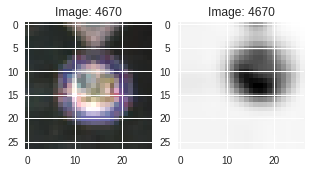

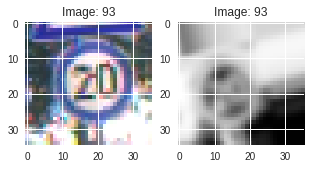

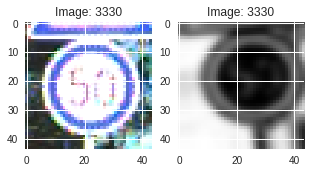

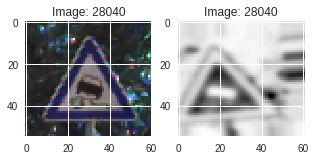

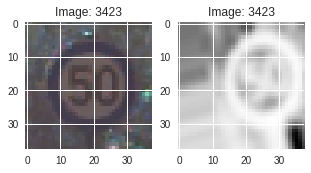

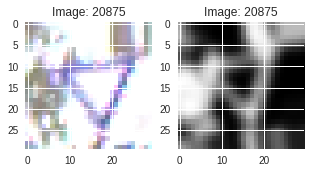

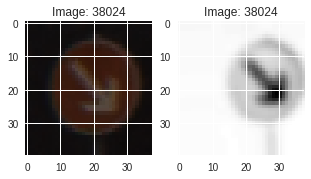

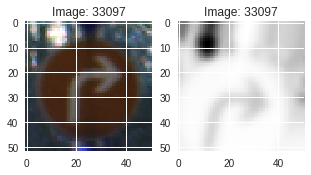

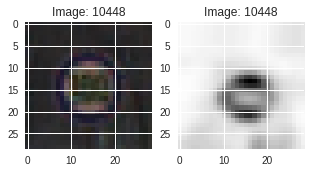

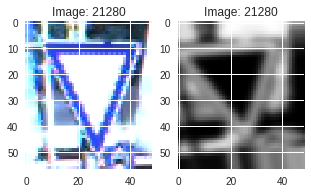

In [12]:
s = random.sample(range(0,len(original_images)), 10)

for e in s:
  figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
  ax1.set_title("Image: {}".format(e))
  ax2.set_title("Image: {}".format(e))
  
  ax1.imshow(original_images[e])
  idx = 1
  t = 0
  temp_preprocess = preprocessed_images[e]
  temp_preprocess = np.expand_dims(temp_preprocess, axis=0)
  for batch in augmented_data_gen.flow(temp_preprocess, batch_size=1):
    t = batch[0].squeeze()
    plt.imshow(t)
    if idx % 1 == 0:
      break
      
  ax2.imshow(t)



In [0]:
#free memory
original_images = None
preprocessed_images = None

Tried to reduce the data we had by erasing a part, it just make the traning worse

In [14]:
#useless
"""#reduce the number of files to make it easier to the model to finish.

print(len(os.listdir(full_dir))) #before erase

for d in directories:
  full_dir = os.path.join(train_dir,d)
  names = os.listdir(full_dir) #all the file names of the directory
  random.shuffle(names)
  
  #with the random order of each file get the size
  size = len(names)
  
  #delete half dataset
  print(len(os.listdir(full_dir))) #before erase
  
  for e in range(size//2):
    file_to_remove = os.path.join(full_dir,names[e])
    os.remove(file_to_remove)
    
print(len(os.listdir(full_dir))) #after erase
"""

'#reduce the number of files to make it easier to the model to finish.\n\nprint(len(os.listdir(full_dir))) #before erase\n\nfor d in directories:\n  full_dir = os.path.join(train_dir,d)\n  names = os.listdir(full_dir) #all the file names of the directory\n  random.shuffle(names)\n  \n  #with the random order of each file get the size\n  size = len(names)\n  \n  #delete half dataset\n  print(len(os.listdir(full_dir))) #before erase\n  \n  for e in range(size//2):\n    file_to_remove = os.path.join(full_dir,names[e])\n    os.remove(file_to_remove)\n    \nprint(len(os.listdir(full_dir))) #after erase\n'

Now I have to design the test_generator, train_generator and validation_generator

In [15]:
ts = (160,160) #target size
batchSize = 20
print(train_dir)
train_generator = augmented_data_gen.flow_from_directory(
train_dir,
target_size=ts,
batch_size=batchSize,
class_mode='categorical',
subset='training')


validation_generator = augmented_data_gen.flow_from_directory(
train_dir,
target_size=ts,
batch_size=batchSize,
class_mode='categorical',
subset='validation')

test_data_gen = ImageDataGenerator(rescale=1./255)

# Image data generator for the test data: it is processed the same as the train data
test_generator = test_data_gen.flow_from_directory(
test_dir,
target_size=ts,
batch_size=20,
class_mode='categorical')

./Data_sets/German_Traffic_signs/train
Found 21975 images belonging to 43 classes.
Found 5471 images belonging to 43 classes.
Found 11763 images belonging to 43 classes.


Here I created the generator for the data augmentation. It reescales the color, and has 20% of range in the other options. Only rotation scale, that is set at 40, and horizontal_flip, that is a bool, have different values.

After that there is a function called preprocess and a loop.

The loop gets each file in the training folder, changes it to gray scale and save a copy to have the original, then the gray scaled image is sent to the preprocess function where it is applied a gaussean blur and expanded one time to indicate the channel is 2D for the generator.

Here we take 10 random images and send them through the generator, then it is plotted the original and the preprocessed image.

Finally we save the images in a different folder. The new folder contains the images we will send to two new generators, the train_generator and the validation_generator.

## Design and test a model

Design and implement a deep learning model, tran and test it with the german traffic sign data set. It is recommended to start from already stablished models. For reference, look at: [Common architectures in convolutional neural networks.](https://www.jeremyjordan.me/convnet-architectures/), [Convolutional networks case studies](http://cs231n.github.io/convolutional-networks/#case), [VGG Net, 1st runner of of ilsvlc 2014](https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11), [GoogLeNet, winner of ilsvrc 2014](https://medium.com/coinmonks/paper-review-of-googlenet-inception-v1-winner-of-ilsvlc-2014-image-classification-c2b3565a64e7), [Resnet, winner of ilsvrc 2015](https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8).

Describe the model you used and discuss why you selected it.

For the model I decided to try first the VGG-13 remembering the example in class. Based in that i will use VGG16 or adjust VGG-13 using dropout and increasing or decreasing layers.

After that model I tried reducing mor than half the model. All theconvutional layers were reduced from two convolutionals to one and the fifth group of layers was eliminated.
This didn´t improve anything, the time was almost the same, the percentage of accuracy was lower and the parameters used instead of decreasing almost triplicated. So I decided to keep the original model and add batch normalization 

In [19]:
# TODO: Define a model based on a particular architecture. Include the model summary.

inputShape = (ts[0],ts[0], 3)
print(inputShape)
classes = len(os.listdir(train_dir))
keras.layers.BatchNormalization()


model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = inputShape, padding="same" ))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding="same"))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1000, activation='relu'))

model.add(layers.Dense(classes, activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])



(160, 160, 3)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 160, 160, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 160, 160, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 80, 80, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 80, 80, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 128)       0         
________________________________________________________

Using VGG-13 showed great results in just 5 epochs, but it was too slow and requiered images with dimension of at least 160x160. Now I will make a smaller one to improve the time but mantain the results

## Train and test the model

Include a discussion on the tests / different configurations used for the optimizer, batch size, epochs, and other hyperparameters for the training. Use early stopping and save the best weights as the training develops. Include plots for the training and validation accuracy of the model. Additionally, evaluate the model with the test data. If you used a stablished architecture, mention why you think it was suitable for this problem.

After the training step, save both the model and the weights to a file.

For VGG-13 without any modification and using all the 70% of the images to train and validate and a batchSize of 50 for train and validation

- training set accuracy of ?
0.9635 

- validation set accuracy of ?
0.1447

- test set accuracy of ?
0.9760



- What were some problems with the initial architecture?
The data wasn´t enough to complete the process.

- How was the architecture adjusted and why was it adjusted? 
I read about the activation function and tried to find an equivalent to dropdown. I found that the recomendation is using batch normalization instead of a dropdown just beacouse we want to our neurons keep training to be able to recognize better a seccion and the batch normalizations helps more to regulate. Also in [the article](https://towardsdatascience.com/dont-use-dropout-in-convolutional-networks-81486c823c16) there was a experiment showing that using dropdown is worse than training the network without it. Also I didnt changed relu because the same article has a presentation where expleains why is used. Sigmoid and tahn are slower to converge and have more problems than relu. There are also other two, an improvement of relu that doubles the parameters in the neurons and another one that works in some cases and in others it is worse.

- Which parameters were tuned? How were they adjusted and why?
The images to be expanded to a size of 160x160 to work, changed the padding to same and decreassing the batch size from 50 to 20. That allowed me to successfuly run the data across the network and keeping even more data for the next layers. This meaned an increase in precission but some extra minutes in training.

- Did the model over or underfit? When and why do you think it happened?
It may be underfited, the last point was not the best the training generated but it was not too far from it.
This may happen because it was trying to converge and for the data it is dificult.

In [17]:
# TODO: Define the training, and discuss the process

VGG13_checkpointer = ModelCheckpoint(filepath='VGG_13_traffic_signs.weights.best.hdf5', verbose=1, save_best_only=True)
VGG13_earlyStop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit_generator(
train_generator,
epochs=10,
validation_data=validation_generator,
steps_per_epoch=train_generator.samples // batchSize,
validation_steps=validation_generator.samples // batchSize,
callbacks=[VGG13_checkpointer, VGG13_earlyStop])#sd

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1098/1098 [==============================] - 448s 408ms/step - loss: 3.4481 - acc: 0.0737 - val_loss: 3.3074 - val_acc: 0.0797

Epoch 00001: val_loss improved from inf to 3.30745, saving model to VGG_13_traffic_signs.weights.best.hdf5
Epoch 2/10
1098/1098 [==============================] - 443s 404ms/step - loss: 2.2262 - acc: 0.3437 - val_loss: 1.5907 - val_acc: 0.5043

Epoch 00002: val_loss improved from 3.30745 to 1.59070, saving model to VGG_13_traffic_signs.weights.best.hdf5
Epoch 3/10
1098/1098 [==============================] - 440s 401ms/step - loss: 0.8342 - acc: 0.7368 - val_loss: 1.2940 - val_acc: 0.7125

Epoch 00003: val_loss improved from 1.59070 to 1.29404, saving model to VGG_13_traffic_signs.weights.best.hdf5
Epoch 4/10
1098/1098 [==============================] - 439s 400ms/step - loss: 0.3849 - acc: 0.8815 - val_loss: 0.5381 - val_acc: 0.8569

Epoch 00004: val_loss improved from 1.29404 to 0.53814, saving mode

For testing I only changed the batch size, epochs and the padding in the architecture.

The batch was increased at the beginning, from 50 to 100. The training increased the speed a few minutes, but the training was poor. So I opted to reduce it an happend the contrary, the speed slowed but the training was even better. 

For epochs I started with 5, it was too much time to train the network and it already gave pretty good results, the only change made here was increase the epochs to 10 to give extra time to the network to converge.

At last the padding, I figured out the problem of the size of the input, but by changing the padding the network had more data in each layer and it could be able to have a better training.

I used the VGG-13 model because I wanted an architecture that was able get around the 90% of accuracy and then began to adjust some extra parameters to make it better.

In [18]:
results = model.evaluate_generator(test_generator, steps=test_generator.samples // 20)
print(results)#m

[0.06954342540444544, 0.9840136021375656]


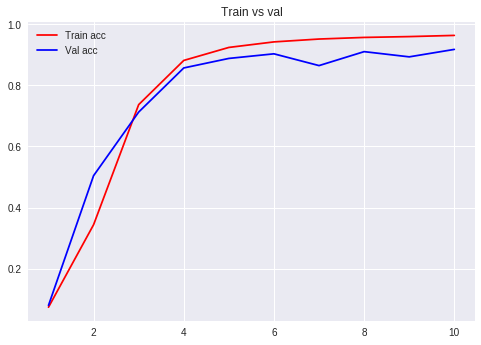

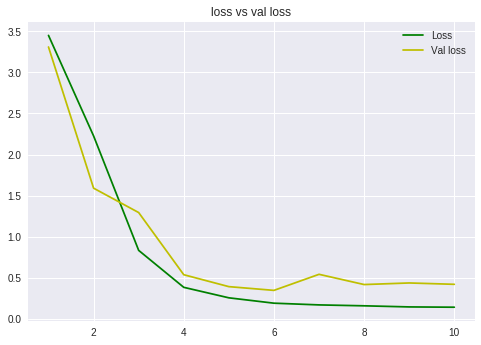

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Train acc')
plt.plot(epochs, val_acc, 'b', label='Val acc')
plt.title('Train vs val')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Loss')
plt.plot(epochs, val_loss, 'y', label='Val loss')
plt.title('loss vs val loss')
plt.legend()
plt.show()


In [0]:
#save the model
model.save('VGG_13__traffic_signs.model.hdf5')

## Test the model on new images

Find at least 10 new images from different categories and use your model to predict the traffic sign type. Plot each of the images before the prediction, after the preprocessing step, and after the prediction with its predicted label.

### Load the images

In [61]:
!git clone https://github.com/A01022089/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 23 (delta 0), reused 23 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [0]:
test_images_dir = './Datasets/traffic_signs/'
classes = 43
for c in range(classes):
  name =  ( '0'*(5-len(str(c))) +str(c) ) #create the name with format of 5 chars
  temp_dir = os.path.join(test_images_dir, name )
  if(name not in os.listdir(test_images_dir)): #check if it exists
    os.mkdir(temp_dir)

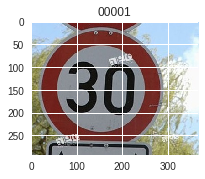

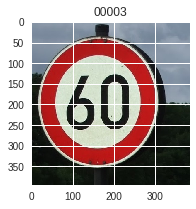

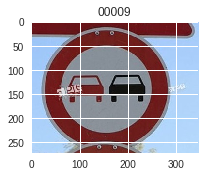

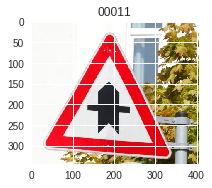

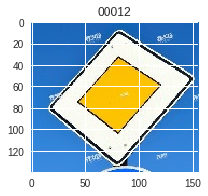

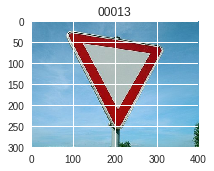

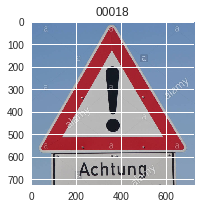

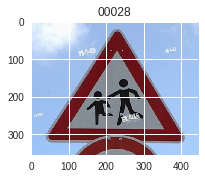

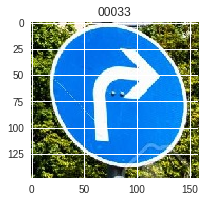

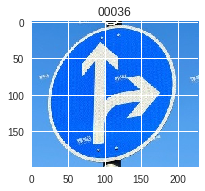

In [63]:
# TODO Load the new images and plot them
new_directories = os.listdir(test_images_dir)
new_directories.sort()
my_images = []
for nd in new_directories:
  temp_path = os.path.join(test_images_dir, nd)
  temp_names =  os.listdir( temp_path  )
  if len(temp_names) != 0:
    img = cv2.imread( os.path.join(temp_path, temp_names[0]) )
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    figure, p = plt.subplots(1, 1, figsize=(3,3))
    p.set_title(nd)
    p.imshow(img)
    my_images.append(img)

### Predict the type for each image

./Datasets/traffic_signs/00001/img08.jpg
./Datasets/traffic_signs/00003/img05.jpg
./Datasets/traffic_signs/00009/img07.jpg
./Datasets/traffic_signs/00011/img09.jpg
./Datasets/traffic_signs/00012/img01.jpg
./Datasets/traffic_signs/00013/img04.jpg
./Datasets/traffic_signs/00018/img10.jpg
./Datasets/traffic_signs/00028/img06.jpg
./Datasets/traffic_signs/00033/img03.jpg
./Datasets/traffic_signs/00036/img02.jpg


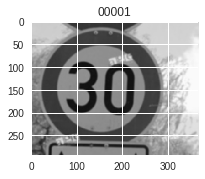

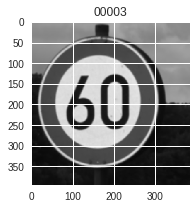

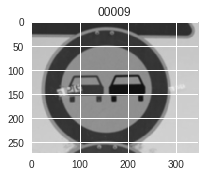

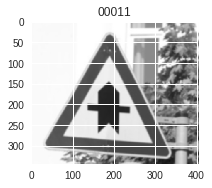

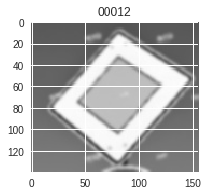

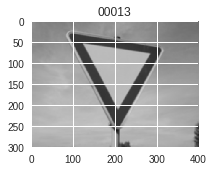

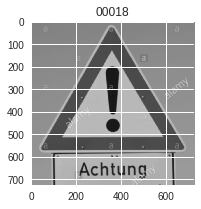

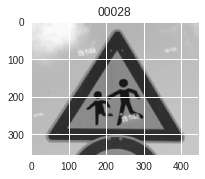

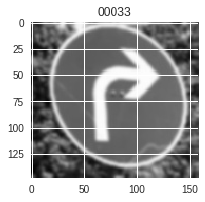

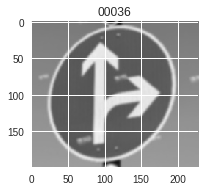

In [64]:
#preprocess the images and plot them
for nd in new_directories:
  temp_path = os.path.join(test_images_dir, nd)
  temp_names =  os.listdir( temp_path  )
  if len(temp_names) != 0:
    img = cv2.imread( os.path.join(temp_path, temp_names[0]) )

    img = (cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)) #to gray scale

    new_image = preprocess(img) #preprocess the image
    
    #save the new image in the directory
    temp_names[0] =  temp_names[0].replace('ppm','jpg')

    #rewrite the image
    cv2.imwrite( (temp_path+'/'+ temp_names[0]), new_image)
    print((temp_path+'/'+ temp_names[0]))
    
for nd in new_directories:
  temp_path = os.path.join(test_images_dir, nd)
  temp_names =  os.listdir( temp_path  )
  if len(temp_names) != 0:
    img = cv2.imread( os.path.join(temp_path, temp_names[0]) )
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    figure, p = plt.subplots(1, 1, figsize=(3,3))
    p.set_title(nd)
    p.imshow(img)

Create a new generator, has the same configuration. The only change it was made is the different directory

---



In [65]:
test_data_gen = ImageDataGenerator(rescale=1./255)

# Image data generator for the test data: it is processed the same as the train data
own_images_test_generator = test_data_gen.flow_from_directory(
test_images_dir,
target_size=ts,
batch_size=1, #for each image
class_mode='categorical',
shuffle = False)

Found 10 images belonging to 43 classes.


In [0]:
model.load_weights('./VGG_13_traffic_signs.weights.best.hdf5')

In [67]:
# TODO use the model to make prediction on the images. Remember to preprocess the new images with 
# the same process used for the training images

test_results = model.predict_generator(
    own_images_test_generator,
    steps = 10, #images in to test 
    verbose = 1) 

10/10 [==============================] - 0s 21ms/step


### Analyze the performance

Calculate the accuracy, and plot the images that were incorrectly classified. Discuss why those images were incorrectly classified.

In [68]:
# TODO Calculate the accuracy for the new images
my_images_results = model.evaluate_generator(own_images_test_generator, steps=10, verbose=1)
print(my_images_results)#m

10/10 [==============================] - 0s 20ms/step
[0.0012800210178895099, 1.0]


In [69]:
images_true_label = [1,3,9,11,12,13,18,28,33,36]
correctly = 0
miss = 0
for tr,tl, img in zip (test_results, images_true_label, my_images):
  top = np.unravel_index(np.argsort(tr, axis=None), tr.shape)
  top = top[0][-1]
  
  if(top == tl):
    correctly += 1
  else:
    figure, p = plt.subplots(1, 1, figsize=(3,3))
    p.imshow(img)
    miss +=1

print("Correct: ",correctly)
print("Incorrect: ",miss)
print("Accuracy: ", correctly/(correctly+miss)*100,"%" )

Correct:  10
Incorrect:  0
Accuracy:  100.0 %


## Output the top 5 softmax probabilites for each image

For each of the new images, print the top 5 softmax categories it predicted. Check [numpy argsort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html) to get sorted indices of a prediction.

(10, 43)


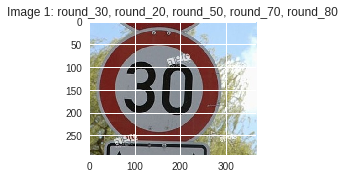

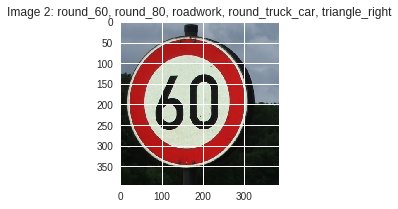

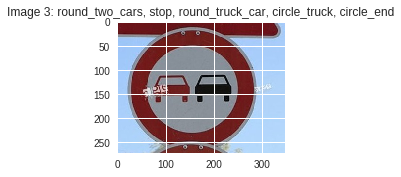

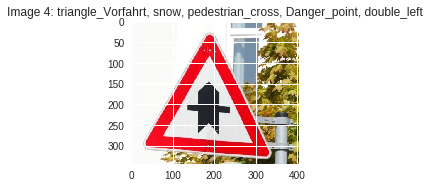

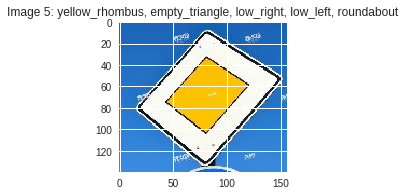

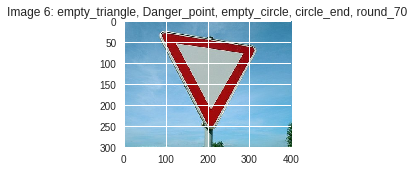

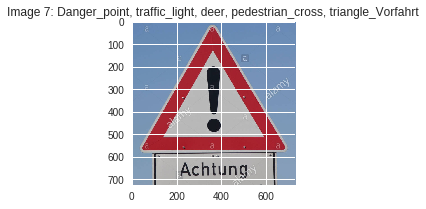

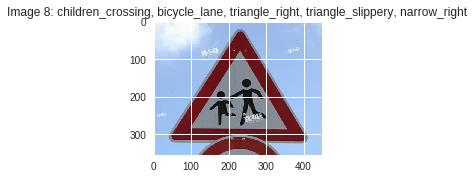

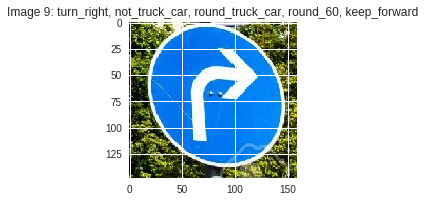

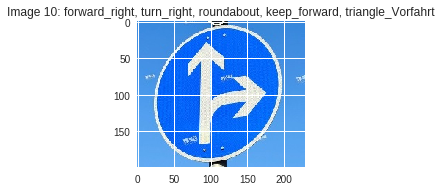

In [70]:
# TODO: for each image, plot the image and print the top 5 softmax categories predicted
print(test_results.shape)

num = 1
for tr,img in zip (test_results, my_images):
  top_5 = np.unravel_index(np.argsort(tr, axis=None), tr.shape)
  top_5 = top_5[0][::-1]
  
  figure, p = plt.subplots(1, 1, figsize=(3,3))
  #p.set_title(top_5[0:5])
  p.set_title("Image {}: {}, {}, {}, {}, {}".format(num,label_names[top_5[0]], label_names[top_5[1]],label_names[top_5[2]],label_names[top_5[3]],label_names[top_5[4]]))
  p.imshow(img)
  num += 1

## Create a new model using transfer learning

Use one of the pretrained models from [keras applications](https://keras.io/applications/#applications) to train a new model for the traffic data set. Test the model on the test data, and the new images you downloaded. As with the previous steps, record the accuracy of the model, and print the top 5 softmax predictions for the 10 images you acquired. Plot the accuracy, and the validation accuracy of this model.

- Mention why you chose the selected pretrained model.

That model was selected because keras didn't have a VGG13 model and it was the closest one to mine.

- training set accuracy of ?
    0.8646
- validation set accuracy of ?
    0.7265
- test set accuracy of ?
    0.8828

In [71]:
#use VGG16 from keras
conv_base = VGG16(weights='imagenet', include_top = False, input_shape=inputShape)

conv_base.summary()
conv_base.trainable = False

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool

In [0]:
#let freezed just the top 4 layers
conv_base.trainable = True
set_trainable = False 

for layer in conv_base.layers: 
  if layer.name == 'block5_conv1': 
    set_trainable = True 
    
  if set_trainable: 
    layer.trainable = True 
  else: layer.trainable = False

In [73]:
#Add the dense layers
model_fine_tunning = models.Sequential() 
model_fine_tunning.add(conv_base)
model_fine_tunning.add(layers.Flatten()) 

model_fine_tunning.add(layers.Dense(4000, activation='relu')) 
model_fine_tunning.add(layers.Dense(2000, activation='relu')) 
model_fine_tunning.add(layers.Dense(1000, activation='relu')) 

model_fine_tunning.add(layers.Dense(classes, activation='softmax'))

model_fine_tunning.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

model_fine_tunning.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 4000)              51204000  
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              8002000   
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_8 (Dense)              (None, 43)                43043     
Total params: 75,964,731
Trainable params: 68,329,467
Non-trainable params: 7,635,264
________________________________________________________

In [36]:
fine_tunning_checkpointer = ModelCheckpoint(filepath='fine_tunning_traffic_signs.weights.best.hdf5', verbose=1, save_best_only=True)
fine_tunning_earlyStop = EarlyStopping(monitor='val_loss', patience=5)

history = model_fine_tunning.fit_generator(
train_generator,
epochs=10,
validation_data=validation_generator,
steps_per_epoch=train_generator.samples // batchSize,
validation_steps=validation_generator.samples // batchSize,
callbacks=[fine_tunning_checkpointer, fine_tunning_earlyStop])#

Epoch 1/10
1098/1098 [==============================] - 313s 285ms/step - loss: 2.2948 - acc: 0.3436 - val_loss: 1.8403 - val_acc: 0.4592

Epoch 00001: val_loss improved from inf to 1.84026, saving model to fine_tunning_traffic_signs.weights.best.hdf5
Epoch 2/10
1098/1098 [==============================] - 310s 282ms/step - loss: 1.2981 - acc: 0.6108 - val_loss: 1.5433 - val_acc: 0.5669

Epoch 00002: val_loss improved from 1.84026 to 1.54330, saving model to fine_tunning_traffic_signs.weights.best.hdf5
Epoch 3/10
1098/1098 [==============================] - 308s 281ms/step - loss: 0.9217 - acc: 0.7187 - val_loss: 1.4956 - val_acc: 0.6094

Epoch 00003: val_loss improved from 1.54330 to 1.49558, saving model to fine_tunning_traffic_signs.weights.best.hdf5
Epoch 4/10
1098/1098 [==============================] - 309s 281ms/step - loss: 0.7267 - acc: 0.7821 - val_loss: 1.1756 - val_acc: 0.6936

Epoch 00004: val_loss improved from 1.49558 to 1.17562, saving model to fine_tunning_traffic_sign

In [37]:
results = model_fine_tunning.evaluate_generator(test_generator, steps=test_generator.samples // 20)
print(results)#

[0.4948716291808853, 0.8828238062544697]


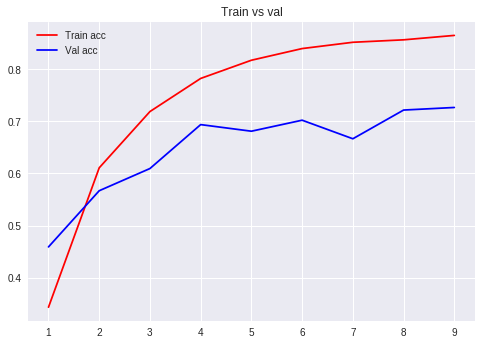

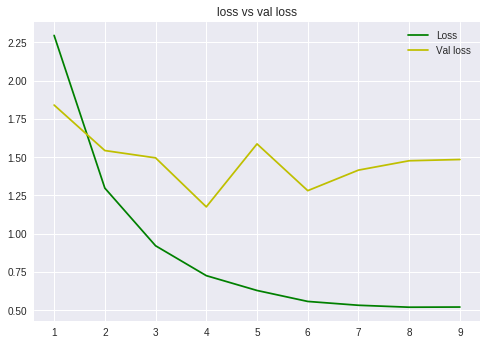

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Train acc')
plt.plot(epochs, val_acc, 'b', label='Val acc')
plt.title('Train vs val')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Loss')
plt.plot(epochs, val_loss, 'y', label='Val loss')
plt.title('loss vs val loss')
plt.legend()
plt.show()


In [0]:
#save the model
model.save('fine_tunning_traffic_signs.model.hdf5')

###Testing of the fine tunned network

In [0]:
model_fine_tunning.load_weights('./fine_tunning_traffic_signs.weights.best.hdf5')

In [98]:
test_data_gen = ImageDataGenerator(rescale=1./255)

# Image data generator for the test data: it is processed the same as the train data
generator_2 = test_data_gen.flow_from_directory(
test_images_dir,
target_size=ts,
batch_size=1, #for each image
class_mode='categorical',
shuffle = False)

Found 10 images belonging to 43 classes.


In [99]:
# TODO use the model to make prediction on the images. Remember to preprocess the new images with 
# the same process used for the training images

test_results = model.predict_generator(
    generator_2,
    steps = 10, #images in to test 
    verbose = 1) 

10/10 [==============================] - 0s 21ms/step


In [129]:
# TODO use the model to make prediction on the images. Remember to preprocess the new images with 
# the same process used for the training images

tunned_test_results = model_fine_tunning.predict_generator(
    generator_2,
    steps = 10, #images in to test 
    verbose = 1) 

10/10 [==============================] - 0s 22ms/step


Correct:  8
Incorrect:  2
Accuracy:  80.0 %


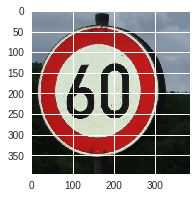

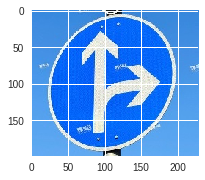

In [130]:
images_true_label = [1,3,9,11,12,13,18,28,33,36]
correctly = 0
miss = 0
for tr,tl, img in zip (tunned_test_results, images_true_label, my_images):
  top = np.unravel_index(np.argsort(tr, axis=None), tr.shape)
  top = top[0][-1]
  
  if(top == tl):
    correctly += 1
  else:
    figure, p = plt.subplots(1, 1, figsize=(3,3))
    p.imshow(img)
    miss +=1

print("Correct: ",correctly)
print("Incorrect: ",miss)
print("Accuracy: ", correctly/(correctly+miss)*100,"%" )

(10, 43)


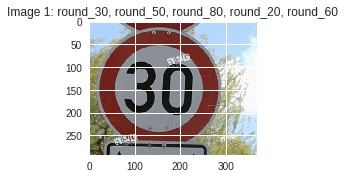

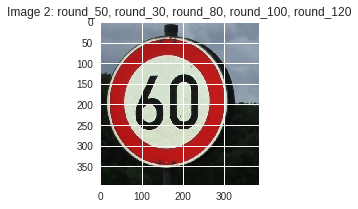

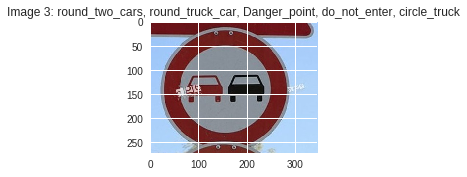

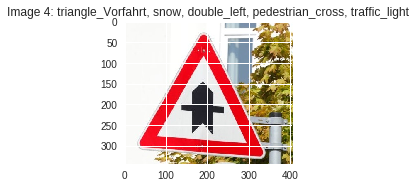

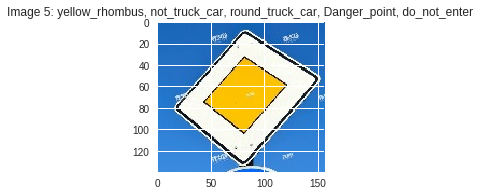

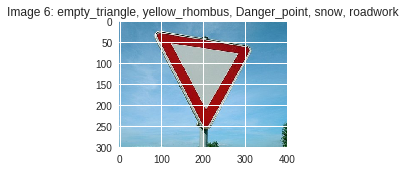

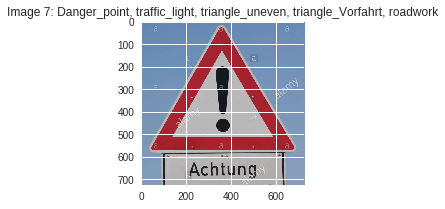

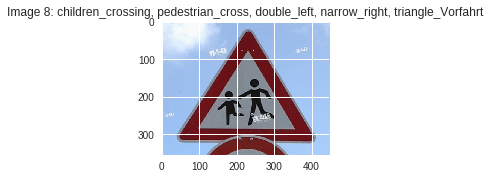

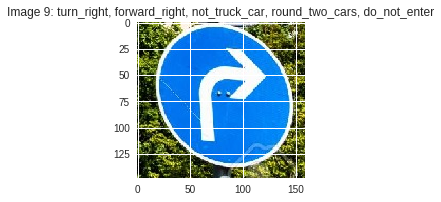

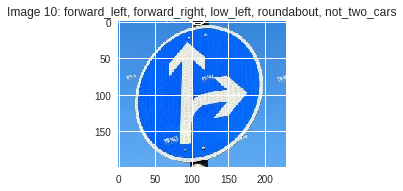

In [131]:
# TODO: for each image, plot the image and print the top 5 softmax categories predicted
print(tunned_test_results.shape)

num = 1
for tr,img in zip (tunned_test_results, my_images):
  top_5 = np.unravel_index(np.argsort(tr, axis=None), tr.shape)
  top_5 = top_5[0][::-1]
  
  figure, p = plt.subplots(1, 1, figsize=(3,3))
  #p.set_title(top_5[0:5])
  p.set_title("Image {}: {}, {}, {}, {}, {}".format(num,label_names[top_5[0]], label_names[top_5[1]],label_names[top_5[2]],label_names[top_5[3]],label_names[top_5[4]]))
  p.imshow(img)
  num += 1

Here I think the prediction failed for two reasons. 
The first is that the training couldnt be better than 89% if I dont modify som parameters. The callback stopped the trainning in epoch 9.

The second is that the 60 and 50 are almost identical numbers, but the last image (the arrow to the right and forward) shouldn´t be bad classified. There is another classification that is an arrow forward and to the left. Maybe the neuros recognize the two arrows, but not that one is to the left and the other to the right (sense).